In [1]:

import torch
import torchsummary
import os
import sys
import pytorch_lightning as pl
import torch.optim as optim
import torch.nn as nn

ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(ROOT_DIR)

ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(ROOT_DIR)

from utils import helper, input_getter, qai_hub_jobs, tfhelper

from lightning_model import LightningModelCASVIT_T



/home/centar15-desktop1/LPCV_2025_T1/.venv310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-03 18:23:36.067681: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-03 18:23:36.172473: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741022616.213342   14135 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741022616.225767   14135 cud

In [2]:
lightningModel = LightningModelCASVIT_T.load_from_checkpoint("../../models/CASVIT_T/CASVIT_T-epoch=39-train_loss=0.00.ckpt")

model = lightningModel.model
model.eval()


/home/centar15-desktop1/LPCV_2025_T1/src/casvit/lightning_model.py:19: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


RCViT(
  (patch_embed): Sequential(
    (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (network): ModuleList(
    (0): Sequential(
      (0): AdditiveBlock(
        (local_perception): LocalIntegration(
          (network): Sequential(
            (0): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
            (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=96)
            (3): GELU(approximate='none')
            (4): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
          )
        )
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, aff

In [3]:
model.cuda()

torchsummary.summary(model.cuda(), (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 48, 112, 112]           1,344
       BatchNorm2d-2         [-1, 48, 112, 112]              96
              ReLU-3         [-1, 48, 112, 112]               0
            Conv2d-4           [-1, 96, 56, 56]          41,568
       BatchNorm2d-5           [-1, 96, 56, 56]             192
              ReLU-6           [-1, 96, 56, 56]               0
            Conv2d-7           [-1, 96, 56, 56]           9,312
       BatchNorm2d-8           [-1, 96, 56, 56]             192
            Conv2d-9           [-1, 96, 56, 56]             960
             GELU-10           [-1, 96, 56, 56]               0
           Conv2d-11           [-1, 96, 56, 56]           9,312
 LocalIntegration-12           [-1, 96, 56, 56]               0
      BatchNorm2d-13           [-1, 96, 56, 56]             192
           Conv2d-14          [-1, 288,

In [4]:
input = input_getter.local_image_getter("/home/centar15-desktop1/LPCV_2025_T1/datasets/imagenet/new_imgnet_coco/banana/0000316013.jpeg")
input_tensor = input.get_input_torch()

In [5]:
model(input.get_input_torch().cuda())

tensor([[-1.0709e+00, -9.3103e-01, -1.0466e+00, -4.7690e-01,  1.2766e-01,
         -1.7936e+00, -9.2206e-01,  1.5558e-02,  7.0490e-01, -1.4892e+00,
         -1.4247e+00, -8.2659e-01, -2.1123e+00, -1.6537e+00, -5.9410e+00,
         -1.7596e+00, -2.0839e-01, -8.3138e-01, -7.4498e-01, -1.6874e+00,
         -7.8110e-01, -2.0087e+00, -2.0260e+00,  2.2795e-01,  1.4257e-01,
         -6.7586e-01, -3.2254e-01, -1.6083e+00,  5.9979e-02,  7.8342e-01,
         -1.3170e+00, -2.2508e+00, -1.5570e+00, -4.9526e-02,  2.0444e+00,
          1.6563e+01,  3.9854e-01,  1.6142e+00, -1.3179e+00,  2.3791e-02,
         -1.0752e-01, -1.4244e+00,  5.1014e-02,  1.0244e+00,  5.2967e-01,
         -1.0275e+00,  3.6378e+00,  2.9713e-01, -1.0574e+00, -7.7819e-01,
          1.6452e-01,  6.5634e-01, -9.1982e-01, -3.3270e-01,  5.2569e-01,
         -1.1592e+00, -1.3010e+00, -6.4519e-01, -8.6865e-02, -1.0196e-02,
         -1.3036e+00, -1.4398e+00,  3.8569e-01,  2.4177e-01]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [6]:
from dataset import DatasetReader
from dataset.utils import GLOBAL_CLASSES
from torchvision import transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    # transforms.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
    transforms.Resize((224, 224)),  
    # transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])


In [7]:
# categories = helper.get_imagenet_categories()
categories = GLOBAL_CLASSES

helper.print_probablities_from_output(model.cpu()(transform(input.get_input_torch())), categories=categories, modelname = 'Torch Local')

Top-5 predictions for Torch Local on :
35 Banana               100.0%
46 Dining Table           0.0%
43 Couch                  0.0%
37 Orange                 0.0%
34 Bowl                   0.0%


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_eval = model.to(device)

totalPost = 0
accuracyPost = 0

transform = transforms.Compose([
    transforms.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])


dataset_coco_val = DatasetReader.COCODataset(annotation_file='../../datasets/coco/annotations/instances_val2017.json',
    image_dir= '../../datasets/coco/val2017',
    target_classes=[s.lower() for s in GLOBAL_CLASSES],
    transform=transform,
    min_size = 60)

batch_size = 4
dataloader = DataLoader(dataset_coco_val, batch_size=batch_size, shuffle=True, num_workers=11, prefetch_factor=4, persistent_workers=True)

for images, labels, _ in dataloader:
    totalPost += labels.size(0)
    images = images.to(device)
    labels = labels.to(device)
    outputs = model_eval(images)
    _, predicted = torch.max(outputs, 1)
    accuracyPost += (predicted == labels).sum().item()

print(f"Accuracy: {accuracyPost / totalPost}")



Total annotations before filtering: 36781
Total annotations after filtering: 8862
Total COCO annotations: 36781
Filtered annotations: 8862
Accuracy: 0.8797111261566238


In [9]:
idx = 0
from PIL import Image

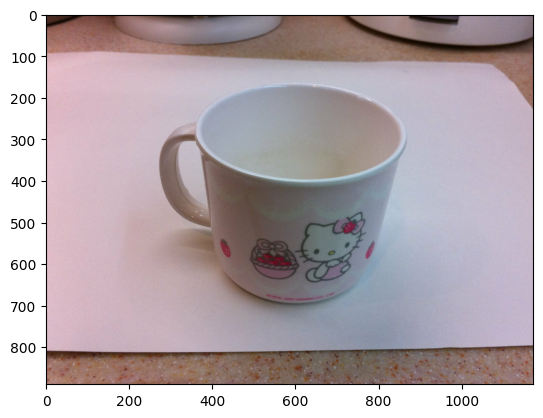

Top-10 predictions for CASVIT on :
31 Cup                   99.8%
46 Dining Table           0.2%
34 Bowl                   0.0%
55 Oven                   0.0%
57 Sink                   0.0%
32 Knife                  0.0%
59 Book                   0.0%
3 Airplane               0.0%
36 Apple                  0.0%
49 Laptop                 0.0%


In [10]:
import matplotlib.pyplot as plt
import skimage as ski
from utils.helper import print_probablities_from_output
categories = GLOBAL_CLASSES


folderpath = "/home/centar15-desktop1/Desktop/example_data/images-20250210T115939Z-001/images/"

transform2 = transforms.Compose([
    transforms.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])


image = Image.open(folderpath + f"{idx}.jpg")

if image.mode == 'RGBA':
    # Convert the image to RGB (remove alpha channel)
    image = image.convert('RGB')


plt.imshow(image)
plt.show()

print_probablities_from_output(model(transform2(image).unsqueeze(0).cuda()), categories, 10, 'CASVIT')

idx = idx + 1

In [111]:
import qai_hub as hub

input_shape = (1, 3, 224, 224)
dummy_input = torch.randn(input_shape)
model_eval
model_traced = torch.jit.trace(model_eval.cpu(), dummy_input)

name = 'CASVIT_T_speed_test'

compile_job_original = hub.submit_compile_job(
    model=model_traced,
    device=hub.Device("Snapdragon 8 Elite QRD"),
    input_specs=dict(image=input_shape),
    name = name + 'tflite'
)
assert isinstance(compile_job_original, hub.CompileJob)


Uploading tmp9r2zndi5.pt


100%|██████████| 82.8M/82.8M [00:03<00:00, 23.5MB/s]


Scheduled compile job (j5ww80645) successfully. To see the status and results:
    https://app.aihub.qualcomm.com/jobs/j5ww80645/



In [112]:
profile_job_original     = hub.submit_profile_job(compile_job_original.get_target_model(), device=hub.Device("Snapdragon 8 Elite QRD"), name = name + 'tflite')

Scheduled profile job (jg90k7nmg) successfully. To see the status and results:
    https://app.aihub.qualcomm.com/jobs/jg90k7nmg/



In [113]:
profile_job_original.download_results('profile_results')

Saved profile results to /home/centar15-desktop1/LPCV_2025_T1/src/casvit/profile_results/CASVIT_T_speed_testtflite_jg90k7nmg_results.json


ProfileJobResult
----------------
status                        : JobStatus
---------
code    : SUCCESS
message : 

url                           : https://app.aihub.qualcomm.com/jobs/jg90k7nmg/
artifacts_dir                 : /home/centar15-desktop1/LPCV_2025_T1/src/casvit/profile_results
Estimated Inference Time (ms) : 1.505
Load Time (ms)                : 1746.583
Peak Memory (MB)              : 627.28515625
Compute Units (layers)        : NPU: 586

In [11]:
import torch.nn as nn
import torchvision.ops as ops
import torchvision.transforms as transforms

class Normalized(torch.nn.Module):

    def __init__(self, mobileNetV3):
        super(Normalized, self).__init__()
        self.model = mobileNetV3
        self.preprocess = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

    def forward(self, img):
        # Pass the preprocessed image through the model
        return self.model(self.preprocess(img))

modelOriginal = model_eval

model = Normalized(modelOriginal)

In [12]:
totalPost = 0
accuracyPost = 0

from dataset import DatasetReader
from dataset import utils

device = torch.device('cuda')

dataset_coco_val = DatasetReader.COCODataset(annotation_file='../../datasets/coco/annotations/instances_val2017.json',
    image_dir= '../../datasets/coco/val2017',
    target_classes=[s.lower() for s in utils.GLOBAL_CLASSES],
    transform=transforms.Compose([
            transforms.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
            transforms.ToTensor()
        ]),
    min_size = 60)


# batch_size = 256
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=11, prefetch_factor=4, persistent_workers=True)

# Ovo sigurno moze da se optimizuje nekako

model.eval()

for i in range(0, len(dataset_coco_val)):
    totalPost += 1
    image, label, _ = dataset_coco_val[i]
    image = image.unsqueeze(0).to(device)
    label = torch.tensor([label]).to(device)
    output = model(image)
    _, predicted = torch.max(output, 1)
    # print(f"Predicted: {predicted.item()}, Actual: {label.item()}")
    if(i % 1000 == 0):
        print(f"Slika: {i}")
    if predicted.item() == label.item():
        accuracyPost += 1
    

print(f"Accuracy: {accuracyPost/totalPost}")

Total annotations before filtering: 36781
Total annotations after filtering: 8862
Total COCO annotations: 36781
Filtered annotations: 8862
Slika: 0
Slika: 1000
Slika: 2000
Slika: 3000
Slika: 4000
Slika: 5000
Slika: 6000
Slika: 7000
Slika: 8000
Accuracy: 0.8806138569171744


In [13]:
import qai_hub

input_shape = (1, 3, 224, 224)

dummy_input = torch.randn(1, 3, 224, 224)
pt_model = torch.jit.trace(model.cpu().eval(), dummy_input)

compile_job = qai_hub.submit_compile_job(
    pt_model,
    name="CASVIT_T", # Replace with your model name
    device=qai_hub.Device("Snapdragon 8 Elite QRD"),
    input_specs=dict(image=input_shape),
)

compile_job.modify_sharing(add_emails=['lowpowervision@gmail.com']) ## Share your model for submission

Uploading tmpxc1b4evz.pt


100%|██████████| 82.8M/82.8M [00:02<00:00, 29.2MB/s]


Scheduled compile job (jg90k7klg) successfully. To see the status and results:
    https://app.aihub.qualcomm.com/jobs/jg90k7klg/

